# Outliers (Aykırı Değerler)

- Verideki genel eğilimin oldukça dışına çıkan değerlere aykırı değer denir. 
- Burada genel eğilim ve oldukça kelimelerinin nasıl tanımlandığını inceleyeceğiz

In [2]:
# Aykırı değerler ne gibi problemlere sebep olabilir.

In [17]:
# Yukarıdaki grafikte görüldüğü üzere ilk grafikte aykırı değer bulunmamakta, ancak 2. grafikteki 3 aykırı değer, grafiğin trend yönünü değiştirmiştir.

Aykırı değerin tespiti yapılırken 5 farklı yol izlenebilir; 

1. Sektör Bilgisi 

2. Standart Sapma yaklaşımı

3. Z-skoru yaklaşımı

4. Boxplot ( Interquartile range-IQR ) yaklaşımı

5. LOF (Local Outlier Factor) Yöntemi (çok değişkenli olarak kullanılır)

In [18]:
# Aykırı değerlerin belirlenmesindeki kritik nokta eşik değerin belirlenmesidir.
# Biz bu yöntemler arasından box plot yöntemini kullanacağız. 

### Aykırı Değerleri Yakalama

In [ ]:
# Bu bölümde aykırı değerleri yakalama işlemi yapacağız. Bunun için bir takım import işlemleri yapmamız gerekmekte;
!pip install missingno
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [20]:
# Virgülden sonra 3 basamak görmek istediğimi ifade ediyoruz;

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Bu çalışmamızda küçük veri setinde çalışmamızı yapıp (titanic veriseti), daha sonrasında ise büyük veri setine (kaggle'da da yer alan home credit default risk projesinin veri seti) uyarlayacağız.

Tekrar tekrar veri okutmak (path almak vs.) işlemleri ile uğraşmamak için fonksiyon tanımlayarak hareket edeceğiz.

In [21]:
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data

df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [22]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### 1. Aykırı Değerleri Yakalama
- Grafik teknikle aykırı değerleri görmek istersek, kutu grafik(boxplot) kullanırız. 
- Elimizde sayısal bir değişken varsa bu sayısal değişkeni en yaygın olarak boxplot ve histogram grafiği kullanılır. 

<function matplotlib.pyplot.show(close=None, block=None)>

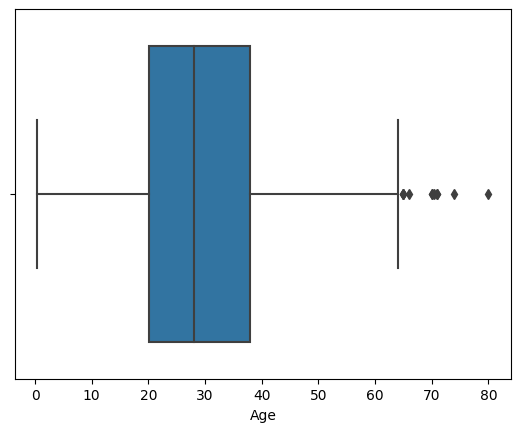

In [34]:
sns.boxplot(x=df["Age"])
plt.show

# Yukarıda x= demezsek grafiği dikey olarak görürüz, bu sebeple x= diyerek düzlem belirtiyoruz. 
# Aşağıda aykırı değerleri görebiliyoruz

In [39]:
# Yukarıdaki grafikte görmüş olduğumuz aykırı değerlere erişmek istiyoruz.
# Bunun için öncelikle verisetimizdeki bu "Age" değişkeninin çeyreklik değerlerine erişmemiz gerekmektedir. Sonrasında IQR hesabı yapacağız;

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

print(low, up)

# Up değer 64.8 yaş low ise -6.68 yaşın - olamayacağını biliyoruz. 

-6.6875 64.8125


In [45]:
# Şimdi outlier değerlere erişeceğiz;
# Bunun için alt sınırdan küçük olanları (< low) ya da üst sınırdan büyük olanları (> up) getirmesini istiyoruz. 

df[(df["Age"] < low) | (df["Age"] > up)]

# Çok fazla outlier değer bulunmadığını gözlemliyoruz.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [47]:
# Outlier değerleri getirdik ancak daha sonra bunları hızlıca bulabilmek için bunların indekslerini saklamamız gerekmektedir;

df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [50]:
# Hızlıca aykırı değer var mı yok mu bakmak istersek; 
df[(df["Age"] < low) | (df["Age"] > up)]. any(axis=None)
# True döndü, bu demektir ki değişkenimizde herhangi bir aykırı değer olduğunu gözlemlemiş oluruz. 

True

In [51]:
# axis=1 seçilirse;

df[(df["Age"] < low) | (df["Age"] > up)].any(axis=1)

# indeks sayıları ile birlikte gelir. 

33     True
54     True
96     True
116    True
280    True
456    True
493    True
630    True
672    True
745    True
851    True
dtype: bool

In [52]:
# axis=0 seçilirse;

df[(df["Age"] < low) | (df["Age"] > up)].any(axis=0)

# Sütun isimleri ile birlikte gelir.

PassengerId    True
Survived       True
Pclass         True
Name           True
Sex            True
Age            True
SibSp          True
Parch          True
Ticket         True
Fare           True
Cabin          True
Embarked       True
dtype: bool

### 2. Fonksiyonlaştırma

In [55]:
# Yukarıdaki işlemi her değişken için tekrarlamak çok zor olacağı için bir fonksiyon oluşturup sonrasında fonksiyon üzerinden ilerlememiz gerekir;
# outlier_threshold adında bir fonksiyon tanımlayalım. Bu fonksiyonun görevi kendisi içine girilen değerlerin eşik değerin üstünde olup olmadığına bakmak olsun.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
    
    # Yukarıdaki fonksiyonu bir değişkenin alt ve üst limitlerin hızlıca hesaplanması için tanımladık.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

    # Yukarıdaki fonksiyonu ise değişkenin içerisinde outlier değer var mı yok mı sorusunun cevabını hızlıca görebilmek için tanımladık.

(-6.6875, 64.8125)

In [57]:
outlier_thresholds(df, "Age")# Şimdi ilk fonksitonu yaş değişkeni için çağıralım.

(-6.6875, 64.8125)

In [58]:
# "Age" değişkeninde aykırı değer var mı bakalım;
check_outlier(df, "Age")

True

In [59]:
# Fare değişkeni için alt ve üst eşik değerleri;
outlier_thresholds(df, "Fare")

(-26.724, 65.6344)

In [60]:
# "Fare" değişkeninde aykırı değer var mı;
check_outlier(df, "Fare")

True

In [61]:
df[(df["Fare"] < low) | (df["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [62]:
# 118 tane problemli değer varmış;
df[(df["Fare"] < low) | (df["Fare"] > up)].index


Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=118)

In [64]:
# Elimizde 100 tane değişken olsa ve buna bakmamız gerekse, tek tek bakmak oldukça zor oalcaktır. Bunun için bir yaklaşım geliştireceğiz.

In [65]:
dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [76]:
# Yukarıdaki veri setimizde 122 değişken (sütun) olduğunu görüyoruz. Bu değişkenleri analiz edebilmek için veri türlerini bilmemiz gerekir.
# Veri numerik gözüküyor ama kategorik mi?
# Verimiz kategorik olduğu halde kardinalitesi yüksek olduğu için nitelik taşııyor olabilir mi?
# Bu soruların cevaplarını verebiliyor olmamız gerekir.

# Titanik veri seti küçük olduğu için anlamıştık, lakin 122 değişkenin olduğu bir veri setinde bunu manuel yapmak pek de mümkün değildir.
# Bu durum için bir fonksiyon tanımlayacağız;

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [77]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

print("########################")
print(cat_cols)
print(num_cols)
print(cat_but_car)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
########################
['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
['PassengerId', 'Age', 'Fare']
['Name', 'Ticket', 'Cabin']


In [78]:
# passengerid değişkeninin bir indeks olduğunu biliyoruz. Bu sebeple bunu çıkaracağız. 
num_cols = [col for col in num_cols if col !="PassengerId"]
num_cols

['Age', 'Fare']

In [80]:
# Şimdi bir de bu çalışmamızı dff için deneyelim;

cat_cols, num_cols, cat_but_car = grab_col_names(dff)


Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [81]:
# Aşağıda görüldüğü üzere "SK_ID_CURR" değişkeni de bu veri setinin ID'sidir. 
# Bu değişkeni numerik değişkenlerin içerisinden çıkarmak isteriz.

num_cols = [col for col in num_cols if col !="SK_ID_CURR"]

In [82]:
num_cols = [col for col in num_cols if col !="SK_ID_CURR"]

for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

### 3. Aykırı Değerlerin Kendilerine Erişme

In [85]:
# Aykırı değerlere erişme problemini de fonksiyonlaştıracağız.

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
#Eğer aykırı değer 10dan büyükse head göstersin, değilse tüm değerleri getirsin diyoruz. 
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [86]:
# Yaş değişkeninin aykırı değerlerine bakalım;

grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

       Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
33  66.000      0      0  C.A. 24579 10.500   NaN        S  
54  65.000      0      1      113509 61.979   B30        C  
96  71.000      0      0    PC 17754 34.654    A5        C  
116 70.500      0      0      370369  7.750   NaN        Q  
280 65.000      0      0      336439  7.750   NaN        Q  


In [87]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

       Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
33  66.000      0      0  C.A. 24579 10.500   NaN        S  
54  65.000      0      1      113509 61.979   B30        C  
96  71.000      0      0    PC 17754 34.654    A5        C  
116 70.500      0      0      370369  7.750   NaN        Q  
280 65.000      0      0      336439  7.750   NaN        Q  


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [88]:
# Şuana kadar aykırı değerleri gördük ve yakaladık. Şimdi ise bu değerleri çıkaracağız ya da görmezden geleceğiz. Bu problemi çözmeye uğraşacağız. 

### 4. Aykırı Değer Problemini Çözme


### 4.1. Silme
        Aykırı değer problemini çözmenin bir yolu da aykırı değerleri veri setinden silmektir.

In [91]:
# Aykırı değerleri tanımlamak için alt ve üst limitlere ihtiyacımız var. Bu sebeple outlier_treshold fonksiyonunu kullanacağız. 
# Fare değişkenine yönelik lox and up değerlerini getirsin. 
low, up = outlier_thresholds(df, "Fare")
print(low, up)


-26.724 65.6344


In [92]:
# Veri setinde kaç değişken var bakalım; 
df.shape

# 891 değişken olduğunu görüyoruz. 

(891, 12)

In [93]:
# Veri setimizdeki aykırı olmayan değerlere de bakalım;

df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

# 775 adet "fare"i aykırı olmayan değişkenimiz olduğunu görüyoruz. 

(775, 12)

In [94]:
# Dataframe'deki ilgili değişken için aykırı değerleri silmek için bir fonksiyon yazalım;

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [95]:
# Aşinayız artık, numerik değişkenleri bulalım ilk önce;

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [96]:
# Verimizin shape'sine bir daha bakalım;

df.shape

(891, 12)

In [97]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [98]:
# yeni veri setimizin shape'sine bakalım

new_df.shape

(775, 12)

In [99]:
df.shape[0] - new_df.shape[0]
# görüldüğü üzere 166 tane gözlem silinmiştir. Böylece silme yöntemi ile aykırılıklardan kurtulduk. 

116

        Bir hücredeki aykırılıktan dolayı o gözlemi silmeyi tercih ettiğimizde, diğer değişkenlerdeki gözlemlerden de oluyoruz. Bunun önüne geçebilmek için o aykırı değeri baskılamayı da tercih edebiliriz.


### 4.2. Baskılama
         Bu kısımda aykırı değerleri baskılayacağız. Buradaki aykırı değerleri eşik değerlerle değiştireceğiz.

In [100]:
low, up = outlier_thresholds(df, "Fare")

print(low, up)

-26.724 65.6344


In [101]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
        ...  
846    69.550
849    89.104
856   164.867
863    69.550
879    83.158
Name: Fare, Length: 116, dtype: float64

In [102]:
# Yukarıdaki işlemi .loc ile de yapabiliriz ;

df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
        ...  
846    69.550
849    89.104
856   164.867
863    69.550
879    83.158
Name: Fare, Length: 116, dtype: float64

In [103]:
# Şimdi loc ile getirdiğimiz değerleri yukarıda tanımlı "up" değerine eşitlersek üst limiti baskılamış oluruz.

df.loc[(df["Fare"] > up), "Fare"] = up


In [104]:
# Aynı şekilde loc ile getirdiğimiz değerleri yukarıda tanımlı "low" değerine eşitlersek alt limiti baskılamış oluruz.

df.loc[(df["Fare"] < low), "Fare"] = low

In [105]:
# Yukarıdaki işlemi fonksiyonlaştıralım;
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [109]:
# Her şeye sıfırdan başlamak için df'e bir reset atacağız;

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [110]:
# kategorik, numerik ve kardinal değişkenleri bir yakalayalım

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [111]:
# numerik değişkenlerden indeksi çıkartalım;

num_cols = [col for col in num_cols if col not in "PassengerId"]

In [112]:
# dataframe'mimizin shape'sine bakalım;

df.shape

(891, 12)

In [113]:
# Aykırı değer var mı bir kontrol edelim;

for col in num_cols:
    print(col, check_outlier(df, col))

# Aşağıda görüyoruz ki varmış.

Age True
Fare True


In [114]:
# Şimdi ise numerik değişkenlerdeki outlier değerleri baskılayacağız;

for col in num_cols:
    replace_with_thresholds(df, col)

In [115]:
# Bir kez daha kontrol edelim aykırı değer kalmış mı;

for col in num_cols:
    print(col, check_outlier(df, col))

# Kalmadığını görüyoruz.

Age False
Fare False


### 5. Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor

- Tek başına aykırı değer olmayan bazı değişkenler birlikte bakıldığında aykırı değer olabilir. Buna çok değişkenli etki denmektedir;
- Örneğin elimizde iki değişken var (yaş ve evlilik sayısı). 3 kere evlenmiş olmak bir aykırı değer olmayabilir ve 17 yaşında olmak da bir aykırı değer olmayabilir. Ancak 17 yaşında 3 kere evlenmiş olmak durumu bir aykırı değerdir. 

Local Outlier Factor (LOF) aykırı değer belirleme yöntemidir. LOF yöntemi ile gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanıma imkanı sağlar.

Bir noktanın lokal yoğunluğu ise ilgili noktanın etrafındaki komşulukları ifade etmektedir. Eğer ki bir nokta komşularının yoğunluğundan anlamlı derece de uzak ise bu nokta daha seyrek bir bölgededir ve aykırı değer olabilir yorumu yapılır.

Aşağıdaki göreseldeki A noktası diğer noktalardan anlamlı derecede uzaktır, aykırı değer olabilir yorumunu yapabiliriz.

<p align="center" > 
    <img src = "2560px-LOF-idea.svg.png" width = "300" />
</p>

LOF yöntemi için aşağıdaki 2 boyutlu grafiğimizi ele alalım. LOF yöntemi sonucu bizler bir skor hesaplarız ve bu hesabın sonucu 1'e ne kadar yakınsa bizim için o değerin inlier (outlier değil) olma olasılığı o kadar fazladır. 

Eğer ki bu skor 1'den ne kadar uzaksa ilgili gözlemin outlier olma olasılığının arttığını görürüz.

Tabi bizler de bu skorlar için eşik değerler belirleyebiliriz. Yukarıdaki grafik için eşik değerimizi 5 olarak belirlersek 2 bariz değeri outlier olmuş olur.

<p align="center" >    
    <img src = "2880px-LOF.svg.png" width = "500"/>

</p>

        Elimizde iki değişken olduğu zaman yukarıdaki grafik gibi bir görselleştirme yapılabilir. Lakin elimizde yüzlerce değişken var ise ne yapacağız?

Elimizde yüzlerce değişken var ve biz bu değişkenleri iki boyutta göstermek istiyorsak;
- Elimizdeki değişkenlerdeki bilgilerin büyük bir miktarını taşıdığı varsayılan iki değişkene indirgeyebilirsek bu soruna bir çözüm getirmiş oluruz.
- Bunu da PCA (Principal Component Analsysis veya Temel Bileşen Analizi) yöntemi ile yapabiliriz.

In [119]:
# diamonds verisini seaborn kütüphanesinden sadece sayısal değişkenlerini getirecek ve eksik değerleri drop ederek çağırıyoruz.

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [120]:
# bizim chech_outlier fonksiyonumuz bulunmaktaydı, aykırı değer olup olmadığını bir kontrol etmek istersek;

for col in df.columns:
    print(col, check_outlier(df, col))

# Görüldüğü üzere bütün değişkenlerimizde aykırı değer bulunmaktadır.

carat True
depth True
table True
price True
x True
y True
z True


In [121]:
# carat değişkeninde kaç adet aykırı değer olduğunu bulmak istersek;

low, up = outlier_thresholds(df, "carat")

df[(df["carat"] < low) | (df["carat"] > up)].shape

# carat değişkeni için  1889 adet aykırı değer olduğunu görmekteyiz.

(1889, 7)

In [122]:
# Veri setindeki değişken sayısını görmek istersek;

df.shape

# 53490 değişken olduğunu görüyoruz.

(53940, 7)

In [123]:
# depth değişkeninde kaç adet aykırı değer olduğunu bulmak istersek;

low, up = outlier_thresholds(df, "depth")

df[(df["depth"] < low) | (df["depth"] > up)].shape

# 2545 adet aykırı değer olduğunu görebiliriz.

(2545, 7)

### Yorum

Şimdi verimize baktığımızda 53940 adet değişken olduğunu görüyoruz. Verimizdeki aykırı değerleri değiştirmek (silmek veya baskılamak) istersek bir takım problemlerele kaşılaşacağız.

 "carat" değişkenini ele alalım. 1889 adet aykırı değişken bulunuyor. Bu aykırı değişkenlere müdahale etmek istersek, carat değişkeninin %3'lük bir kısmına müdahale etmiş oluruz. Geliştiricinin yorumlamasına bağlı olarak bu oranın yüksek bir oran olduğunu söyleyebiliriz.

 "depth" değişkenine müdahale etmek istersek, değişkenin %4'üne müdahale etmiş oluruz. Her değişkenine müdahael ettiğimizde, kümülatif olarak totalde belki de verinin %5'lik bir kısmına müdahalede bulunmuş olacağız.

Daha görmedik lakin **makine öğrenmesinde** karar ağacı kullandığımız yerlerde veriye zaten pek de müdahale etmiyor olmamız gerekmektedir.

Peki bu durumda ne yapmamız gerekiyor. Notebook'un başlarında **outlier_tresholds** diye bir değişken tanımlamıştık. 
Bu değişkeni tanımlarken de interquartile range (iqr) hesaplaması yapmıştık. 

Bu formülü hatırlayacak olursak **IQR = Q3 - Q1**'di. Q3 üçüncü çeyrek, Q1 ise birinci çeyrekti. 

Şimdi biz bu IQR değerini tam çeyreklerden değil de verinin ilk %2,5'luk ve son %2,5'luk değerlerin farkı olarak hesaplarsak, doğal olarak eşik değerlerimiz konusunda daha esnek davranmış oluruz. 

IQR'in tanımı çeyrekler açıklığı olsa da biz verimizdeki aykırı değerler üzerinde alacağımız aksiyonlarda biraz daha esnek olma yönünde kararlar vereceğiz ve gerçekten aykırı sayılabilecek değerleri bulmaya çalışacağız.

In [124]:
# Bu duruma bir örnek vermek istersek;

df_titanic = load()

low_titanic_age, up_titanic_age = outlier_thresholds(df_titanic, "Age")
print(low_titanic_age, up_titanic_age)

-6.6875 64.8125


In [125]:
df_titanic[(df_titanic["Age"] < low_titanic_age) | (df_titanic["Age"] > up_titanic_age)]["Age"]

# Aşaıdaki veriler incelendiğinde en yüksek yaşın 80 olduğunu görüyoruz, 80 yaşında birisinin de gemide olması anormal bir durum değildir.
# Örneğin 150 gibi bir değer olsaydı bu değere aykırıdır diyebilirdir.

# Lakin direk çeyrekler açıklığına bakıldığında yaşı 66 olan birisinin bile aykırı bir değer olduğunu söylememiz gerekir.
# Bu sebeple aykırı değer hesaplanmasında daha esnek olunabilir.

33    66.000
54    65.000
96    71.000
116   70.500
280   65.000
456   65.000
493   71.000
630   80.000
672   70.000
745   70.000
851   74.000
Name: Age, dtype: float64

Yukarıdaki işlemler tek bir değişen üzerinden aykırı değer tespitine yönelik bir hatırtama ve yorumdu.

In [126]:
# Şimdi çok factorlü bir şekilde incelemek istersek, LOF metodunu kullanacaktır.

# Bunun için bir LocalOutlierFactor() fonsiyonunu kullanıyoruz ve içerisine argüman giriyoruz. 
# Burada argümanın in tanımlı değeri olan 20'yi kullanmayı tercih edebiliriz veya bu komşuluk değerini arttırıp azaltabiliriz.

# Lakin burada bir sorun karşımıza çıkmaktadır. 
# Bu değiştime sonucunda hesaplanan komşuluk skorlarının hangisinin daha iyi olduğunun yorumlayamamaktayız.

clf = LocalOutlierFactor(n_neighbors=20)

In [127]:
# Yöntemimizi getirdik. Şimdi veri setimize uygulayalım.

clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [128]:
# Şimdi ise bu değerleri kaydediyoruz;

df_scores = clf.negative_outlier_factor_
df_scores

# Aşağıdaki değerler local outlier factor skorlarıdır. Lakin yukarıda kullandığımız metod bize bu skorları eksi değerler ile verdi.
# df_scores = -df_scores
# Yukarıdaki gibi skorları -1 ile çarparak + değerlere dönüşüm yapılabilir.
# Lakin biz bunları eksi değerlere göre değerlendiriyor olacağız. 

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [129]:
# Yani buradaki değerlerin 1'e yakın olması inlier değer olduğunu gösteriyordu, şu anda ise -1'e yakın olması inlier değer olduğunu gösterecek.
# Bu sebeple değerlei küçükten büyüğe sıralayıp en kötü değerlerimizi görelim;

np.sort(df_scores)[0:5]


array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

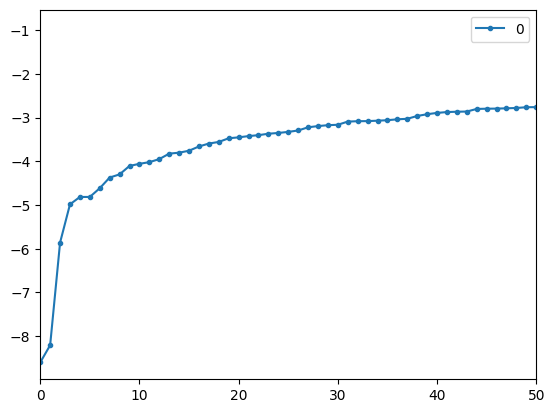

In [130]:
# Burada bir eşik değer belirleyip o değerden küçük olanlar outlier'dır dememiz gerekmektedir.
# Lakin bu eşik değer nasıl belirlenbilir?

# Bunun için "elbow" metodunu uygulayacağız.

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

# "xlim=" argümanına kaç değer gösterileceğini söyleriz.
# "style=" argümanına "*-" değeri ile grafiğin çizgi grafi olması gerektiği ve değerleri belirtmesi gerektiğini ifade ediyoruz.

# Aşağıdaki grafik bir dirseğe benzemekte ve biz en keskin, sert dönüşün olduğu yeri eşik değer olarak belirleyeceğiz.
# Burada ise 3. indekste en keskin dönüşü görebiliyoruz
# Bir geliştirici olarak burayı eşik değer olarak yorumlayabiliriz.

In [131]:
# Yukarda 3. indeks olarak belirlediğimiz eşik değeri bulmak için;

th = np.sort(df_scores)[3]
th

-4.984151747711709

In [133]:
# Şimdi ise aykırı değer sayılan gözlemlerimize bakalım;

df[df_scores < th]

# Bunlar neden aykırı bilmiyoruz. Normalde tek başına depth,carat gibi değerlere baktığımızda yüzlerce aykırı değer gelmişti. 
# Şimdi ise 3 adet aykırı değer olduğunu görüyoruz. 




,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


        Çok değişkenli aykırı değer analizi yaptığımız için 3 adet aykırı değer çıktı, peki neden bu değerler aykırı?

In [134]:
# Verimizin betimsel istatistiklerini getirip bu durumu açıklayalım;

df.describe([0.01, 0.05, 0.25, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.400,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.000,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,56.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,950.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,4.710,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,4.720,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,2.910,3.530,4.040,4.520,5.150,31.800


Gözlem değerlerini betimsel istatistik tablomuzla yorumlayalım.

    * İlk satırdaki verilerin ortalamaya olan uzaklığına bir bakalım;
        * carat ortalama değere yakın ve max ve min noktalardan uzak,
        * depth maksimum değere çok yakın,
        * table ortalamaya yakın,
        * price değeri %25'lik değer ile %50'lik değer arasında,
        * x, y ve z değerleri de ortalamaya yakın

#### Burada depth değeri "78.2" değerinden büyük ama, outlier olarak belirlenmeyen bir değer olmasına rağmen bu değer neden outlier olarak belirlenmiş gibi bir soru sorabiliriz. Buna cevap olarak değişkenler arasında bir uyumsuzluk olmuş olabilir cevabı verilebilir. Örneğin depth değeri çok fazla ama fiyat buna göre ortalamanın altında diye bir yorum getirilebilir.


    * İkinci satırdaki verilerin ortalamaya olan uzaklığına bir bakalım;
        * z değeri maksimum olan gözlem dolayısıyla outlier olması mantıklı diyebiliriz.

In [135]:
# Şimdi aykırı değerleri bulduk bunlar için ne yapabiliriz? Silebiliriz ya da baskılayabiliriz. 
# Bu aykırı değerlerin indekslerini getirelim; 
df[df_scores < th].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [136]:
# Bu verileri df'den silebiliriz;

df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z


In [137]:
# Baskılama yöntemi denemek istersek?

# Baskılamak istersek karşımıza şöyle bir sorun çıkmaktadır, biz hangi değeri hangi değer ile baskılayacağız.
# Yerine ortalama bir gözlemin değerini getirebiliriz. Lakin bu da duplicate oluşturabilir.
# Bu seneryo için 3 adet outlier olması 53490 değer arasında pek de önemli bir sayı olmadığı için direk silebiliriz.
# Yüzlerce aykırı değer olursa, yüzlerce değeri duplice etmiş olacağız. 

### ❗️ Önemli Not 

Ağaç yöntemlerinde veriye müdahale edilmesini pek tercih etmiyoruz. Ağaç yöntemi uygulanacak oldunduğunda yukarıdaki gibi tek değişkenli outlier tespitinde uç noktalardan bu kadar da olmaz diyebileceğimiz ([%2.5 , % 97,5] veya [%1 , % 99]) noktalardan sonraki gözlemlerin sadece ilgili sütunlarını baskılamayı tercih edebiliriz.

Peki LOF yöntemi bizim ne zaman işimize yarayacak diyebiliriz?

LOF yöntemi tam da buradaki gibi göz ardı edebileceğimiz, sildiğimizde bir sorun teşkil etmeyecek zamanlarda kullanılabilir. Eğer ki LOF yöntemi ile yüzlerce veya binlerce silindiğinde veride kayıp oluşturacak veya duplicate olduğunda verimizi bozacak durumlarda kullanılmaz.